# Importing Libraries and Loading Dataset

In [1]:
import pandas as pd
import json

# Load the dataset from the uploaded JSON file
file_path = '/Users/vaibhav/Documents/DS ML/Ola.json'

# Load the data into a DataFrame
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Display the first few rows of the dataset to understand its structure
df.head()

,tweet_id,content,datetime,likes,shares,views,source,isBlue,followers,hashtags,location,user_mentions,media,username,url,comments
0,1871889326575136870,Yet again fucking driver accepted the booking ...,25-12-2024 12:02:48,0,0,23.0,TWITTER,False,93,None,,"[{'name': 'Ola', 'screen_name': 'Olacabs'}]",[https://pbs.twimg.com/media/GfpJadUXkAAqoVS.jpg],desire24_,https://x.com/desire24_/status/187188932657513...,[]
1,1871076431754580058,More than 1 hour and the food is still not her...,23-12-2024 06:12:38,2,1,107.0,TWITTER,False,72,[olafoods],,"[{'name': 'Ola', 'screen_name': 'Olacabs'}, {'...",[https://pbs.twimg.com/media/GfdmGSrWUAA5ZTP.jpg],Karan0072Karan,https://x.com/Karan0072Karan/status/1871076431...,[{'content': 'Customer care services are alway...
2,1871827021585928588,No one is constantly as motherfucking assholes...,25-12-2024 07:55:13,0,0,15.0,TWITTER,False,93,None,,"[{'name': 'Ola', 'screen_name': 'Olacabs'}]",[https://pbs.twimg.com/media/GfoQv5zXIAAcjA_.jpg],desire24_,https://x.com/desire24_/status/187182702158592...,[]
3,1580646160326615041,Freelance content writers needed. Fully remote...,13-10-2022 19:46:26,396,208,NaN,TWITTER,False,101828,None,,[],[https://pbs.twimg.com/media/Fe-VSXbWIAAaMIe.j...,OlamideTowobola,https://x.com/OlamideTowobola/status/158064616...,"[{'content': 'FYI', 'likes': 0, 'shares': 0, '..."
4,1863291107477721485,", Are you guys even concerned about what type ...",01-12-2024 18:36:32,0,0,32.0,TWITTER,False,47,None,,"[{'name': 'Ola', 'screen_name': 'ola_zkzkvm'},...",[https://pbs.twimg.com/media/Gdu9YbvXkAApPHn.jpg],DWasish,https://x.com/DWasish/status/1863291107477721485,[{'content': 'This type of people going forwar...


# Data Cleaning and Preparation

In [2]:
# Step 1: Normalize datetime
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Step 2: Ensure engagement metrics are numeric
engagement_columns = ['likes', 'shares', 'views']
df[engagement_columns] = df[engagement_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Check for and address missing values
missing_summary = df.isnull().sum()

# Step 4: Flatten nested columns if necessary (e.g., 'comments', 'media', 'user_mentions')
# Simplify 'user_mentions' to extract mentioned user names
df['mentioned_users'] = df['user_mentions'].apply(
    lambda x: [mention.get('screen_name') for mention in x] if isinstance(x, list) else []
)

# Count comments for descriptive analysis
df['comment_count'] = df['comments'].apply(len)

# Count media attachments
df['media_count'] = df['media'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Display summary of missing values and cleaned data structure
missing_summary, df.head()


/var/folders/wl/t7ny3crs18l_x1612t08wggr0000gn/T/ipykernel_27610/286613076.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')


(tweet_id            0
 content             0
 datetime            0
 likes               0
 shares              0
 views             802
 source              0
 isBlue              0
 followers           0
 hashtags         2147
 location            0
 user_mentions       0
 media               0
 username            0
 url                 0
 comments            0
 dtype: int64,
               tweet_id                                            content  \
 0  1871889326575136870  Yet again fucking driver accepted the booking ...   
 1  1871076431754580058  More than 1 hour and the food is still not her...   
 2  1871827021585928588  No one is constantly as motherfucking assholes...   
 3  1580646160326615041  Freelance content writers needed. Fully remote...   
 4  1863291107477721485  , Are you guys even concerned about what type ...   
 
              datetime  likes  shares  views   source  isBlue  followers  \
 0 2024-12-25 12:02:48      0       0   23.0  TWITTER   False         9

# Checking and Handling Duplicates and Outliers

In [3]:
# Check for duplicates based on tweet_id (unique identifier for tweets)
duplicate_tweets = df[df.duplicated(subset='tweet_id', keep=False)]

# Check for any rows where critical fields like 'content', 'datetime', or 'likes' are missing
missing_critical_fields = df[df[['content', 'datetime', 'likes']].isnull().any(axis=1)]

# Check for extreme outliers in engagement metrics (likes, shares, views)
engagement_describe = df[engagement_columns].describe()

# Review results for any anomalies
duplicate_tweets, missing_critical_fields, engagement_describe

(                 tweet_id                                            content  \
 0     1871889326575136870  Yet again fucking driver accepted the booking ...   
 2     1871827021585928588  No one is constantly as motherfucking assholes...   
 4     1863291107477721485  , Are you guys even concerned about what type ...   
 5     1869240115614327032              Stop hiring goons to drive your cabs!   
 6     1860045970278613429  ola driver is rude and the way he was talking ...   
 ...                   ...                                                ...   
 3193  1834441289867121093  Hiring bunch of incompetent idi0ts to do the t...   
 3199  1832679606601826507  What an unethical recovery which shows ola bei...   
 3211  1830293091611537535  I want to see death of OLA electric. They suck...   
 3229  1789916830301106443  m waiting my scooter suspention 2 month's very...   
 3230  1789916374598320143  @ i m waiting my scooter suspention 2 month's ...   
 
                 datetime 

# Removing Duplicates

In [4]:
# Remove duplicate tweets based on 'tweet_id', keeping the first occurrence
df = df.drop_duplicates(subset='tweet_id', keep='first')

# Saving Cleaned Data as CSV

In [5]:
# Save the cleaned and preprocessed dataset as a CSV file
cleaned_dataset_path = "Cleaned_Preprocessed_Ola_Dataset.csv"
df.to_csv(cleaned_dataset_path, index=False)
print(f"Cleaned data saved to {cleaned_dataset_path}")

Cleaned data saved to Cleaned_Preprocessed_Ola_Dataset.csv


# Descriptive Analysis

In [6]:

# a. Basic statistics for engagement metrics
engagement_stats = df[engagement_columns].describe()

# b. Top 5 posts with the highest engagement (likes + shares + comments)
df['total_engagement'] = df['likes'] + df['shares'] + df['comment_count']
top_5_engagement = df.nlargest(5, 'total_engagement')[['tweet_id', 'content', 'total_engagement']]

# c. Count of posts with media attachments
media_posts_count = df[df['media_count'] > 0].shape[0]

# Display results
engagement_stats, top_5_engagement, media_posts_count

(              likes        shares         views
 count   2536.000000   2536.000000  1.931000e+03
 mean     164.199921     38.520899  1.885884e+04
 std      881.368807    411.764390  1.194884e+05
 min        0.000000      0.000000  1.000000e+00
 25%        0.000000      0.000000  2.000000e+01
 50%        0.000000      0.000000  5.000000e+01
 75%        5.000000      1.000000  2.810000e+02
 max    20725.000000  17964.000000  2.272445e+06,
                 tweet_id                                            content  \
 30   1649137934841544704  HELP WANTED Tons of PAID work opportunities fo...   
 592  1758125175714021772                             lay off 17.50 5 access   
 382  1842896103618048240  Who said the job market is bad? Just complain ...   
 723  1329638961308962816  I am getting laid off 12/31 but I am going to ...   
 202  1842882565209723381  While the OLA electric CEO rants on someone el...   
 
      total_engagement  
 30              23495  
 592             20754  
 

# Sentiment Analysis

In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
from textblob import TextBlob
import matplotlib as plt

# Perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Categorize sentiments based on polarity
df['sentiment'] = df['content'].apply(analyze_sentiment_textblob)

# Calculate percentage distribution of sentiment categories
sentiment_distribution_textblob = df['sentiment'].value_counts(normalize=True) * 100

# Display results
print(sentiment_distribution_textblob)

# Enhanced Sentiment Distribution Visualization
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon']
)
plt.title('Sentiment Distribution (Percentage)')
plt.ylabel('')  # Remove y-label for aesthetics
plt.tight_layout()
plt.show()

sentiment
Neutral     42.113565
Positive    36.159306
Negative    21.727129
Name: proportion, dtype: float64


AttributeError: module 'matplotlib' has no attribute 'figure'

# Complaint Categorization and Analysis

Complaint Counts:
driver: 609
booking: 71
other: 1802
customer_service: 228


<Figure size 800x600 with 0 Axes>

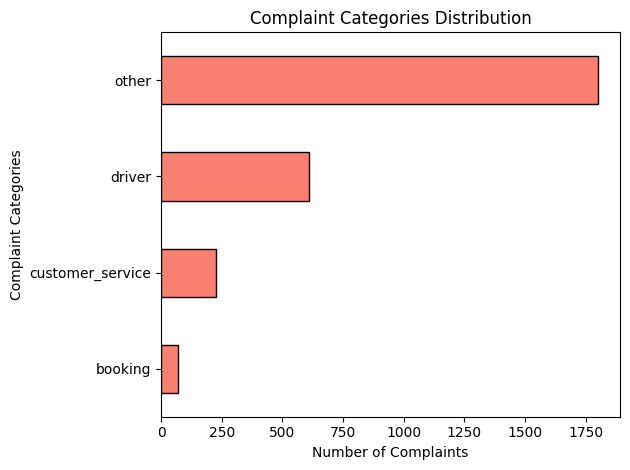

In [ ]:
# Define complaint keywords
complaint_keywords = {
    "driver": ["driver", "cab", "auto", "ride", "chauffeur"],
    "booking": ["booking", "cancel", "cancellation", "confirm"],
    "customer_service": ["customer service", "support", "complaint", "help center"]
}

# Categorize complaints
def categorize_complaint(content):
    categories = []
    for category, keywords in complaint_keywords.items():
        if any(keyword in content.lower() for keyword in keywords):
            categories.append(category)
    return categories if categories else ['other']

df['complaint_categories'] = df['content'].apply(categorize_complaint)

# Flatten and count complaint categories
from collections import Counter
complaint_counts = Counter([cat for sublist in df['complaint_categories'] for cat in sublist])
# Print complaint counts
print("Complaint Counts:")
for category, count in complaint_counts.items():
    print(f"{category}: {count}")

# Enhanced Complaint Categories Visualization
plt.figure(figsize=(8, 6))
complaint_distribution.sort_values(by='Count', ascending=True).plot(
    kind='barh', color='salmon', legend=False, edgecolor='black'
)
plt.title('Complaint Categories Distribution')
plt.xlabel('Number of Complaints')
plt.ylabel('Complaint Categories')
plt.tight_layout()
plt.show()

# Engagement Metrics Analysis

In [213]:
# Correlation between followers and engagement metrics
correlation_matrix = df[['followers', 'likes', 'shares', 'views']].corr()

# Report Generation

In [214]:
# Check if the 'sentiment' column exists
if 'sentiment' not in df.columns:
    # Recreate the 'sentiment' column using TextBlob
    df['sentiment'] = df['content'].apply(analyze_sentiment_textblob)

# Generate visualizations again to include them in the report
# 1. Sentiment Distribution
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='bar', color='skyblue', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
sentiment_chart_path = 'sentiment_distribution.png'
plt.savefig(sentiment_chart_path)
plt.close()

# 2. Complaint Categories Distribution
complaint_distribution.plot(kind='bar', legend=False, color='salmon', title='Complaint Categories Distribution')
plt.xlabel('Complaint Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
complaint_chart_path = 'complaint_distribution.png'
plt.savefig(complaint_chart_path)
plt.close()


# Rebuild the PDF with visualizations included
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Add title
pdf.set_font("Arial", style="B", size=16)
pdf.cell(200, 10, txt="Social Media Data Analysis for Ola Cabs", ln=True, align="C")
pdf.ln(10)

# Add objective
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="Objective:\nAnalyze social media data to extract insights into customer sentiment, engagement, and key areas for service improvement.")
pdf.ln(10)

# Add Key Findings with Visualizations
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, txt="1. Key Findings", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=findings)
pdf.ln(5)
pdf.cell(0, 10, txt="Visualizations:", ln=True)
pdf.image(sentiment_chart_path, w=100, h=70)
pdf.ln(5)
pdf.image(complaint_chart_path, w=100, h=70)
pdf.ln(10)

# Add Recommendations
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, txt="2. Recommendations", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=recommendations)
pdf.ln(10)

# Add Deliverables
pdf.set_font("Arial", style="B", size=14)
pdf.cell(0, 10, txt="3. Deliverables", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=deliverables)
pdf.ln(10)

# Save the enhanced PDF
enhanced_output_path = "Data_Analysis_Report_Ola_Cabs_Updated.pdf"
pdf.output(enhanced_output_path)

enhanced_output_path

'Data_Analysis_Report_Ola_Cabs_Updated.pdf'